In [2]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)


vehicle_df = pd.read_csv('vehicle.csv')
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [4]:
vehicle_df.info()
# The data contains missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [5]:
vehicle_df.shape

(846, 19)

In [7]:
vehicle_df.isnull().sum()


compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [10]:
# replacing the missing values with mode
for column in vehicle_df.columns:
    vehicle_df[column].fillna(vehicle_df[column].mode()[0], inplace=True)


In [11]:
vehicle_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

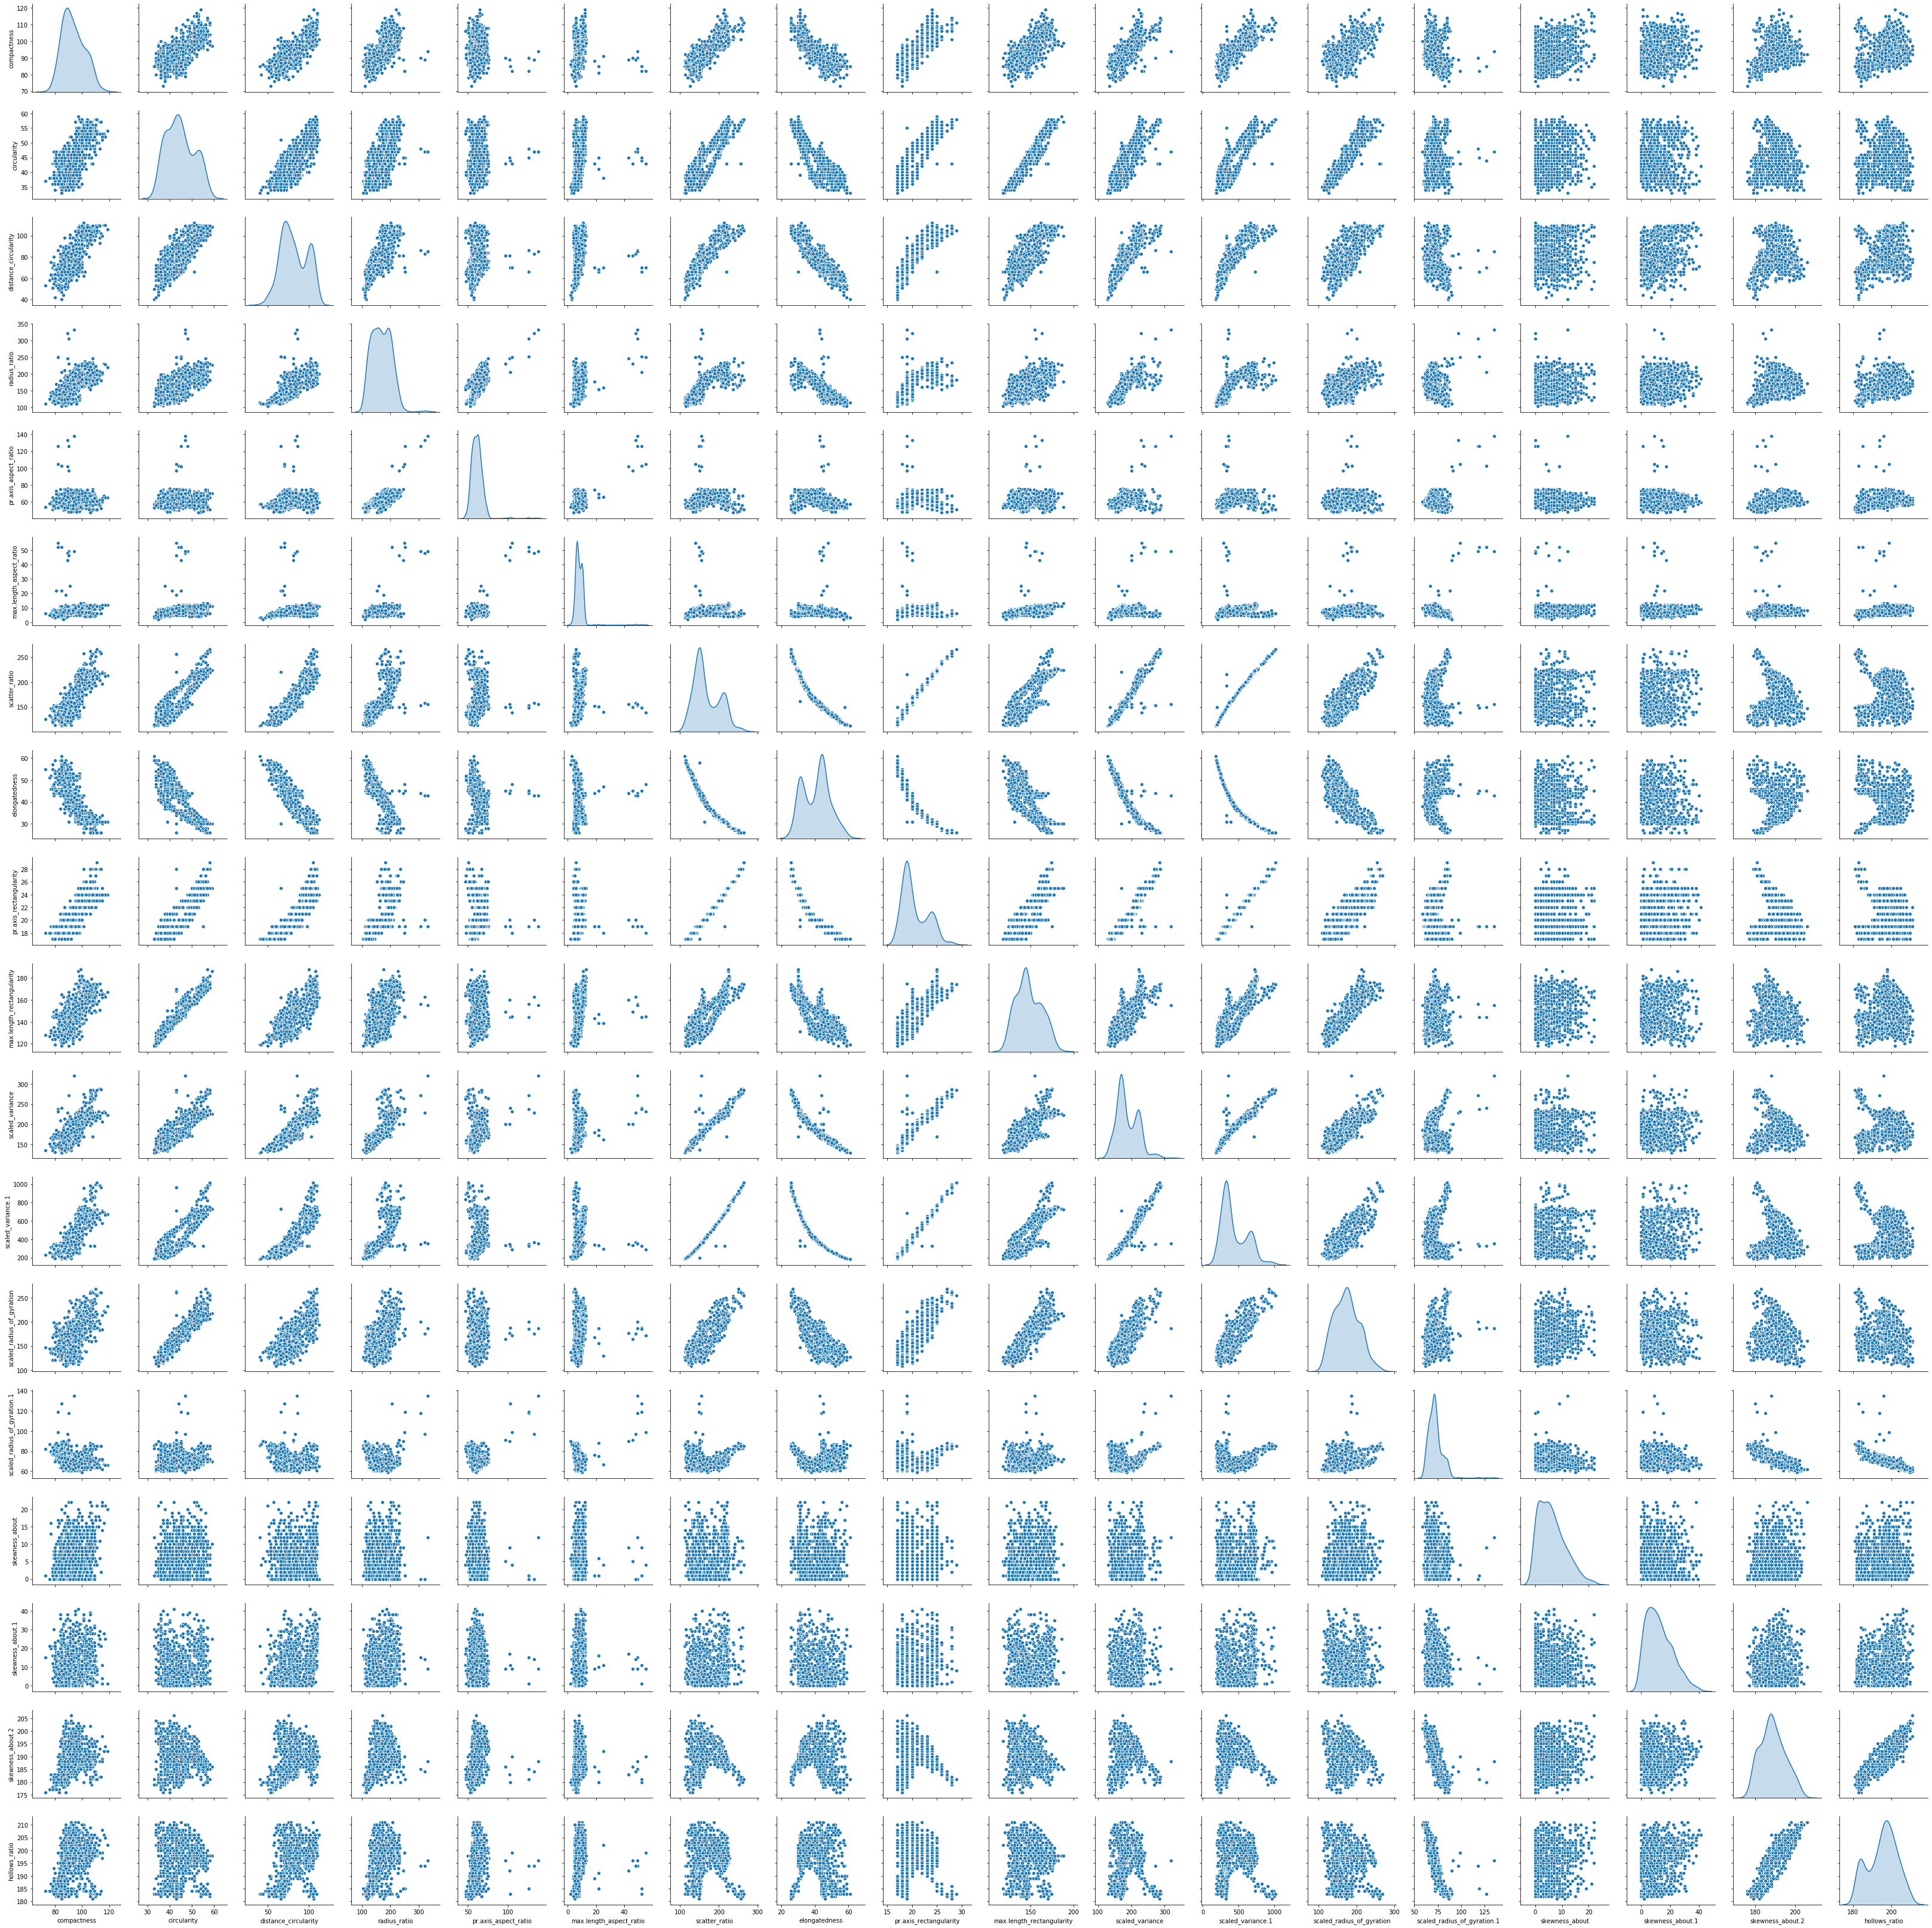

In [12]:
import seaborn as sns

sns.pairplot(vehicle_df, diag_kind="kde")

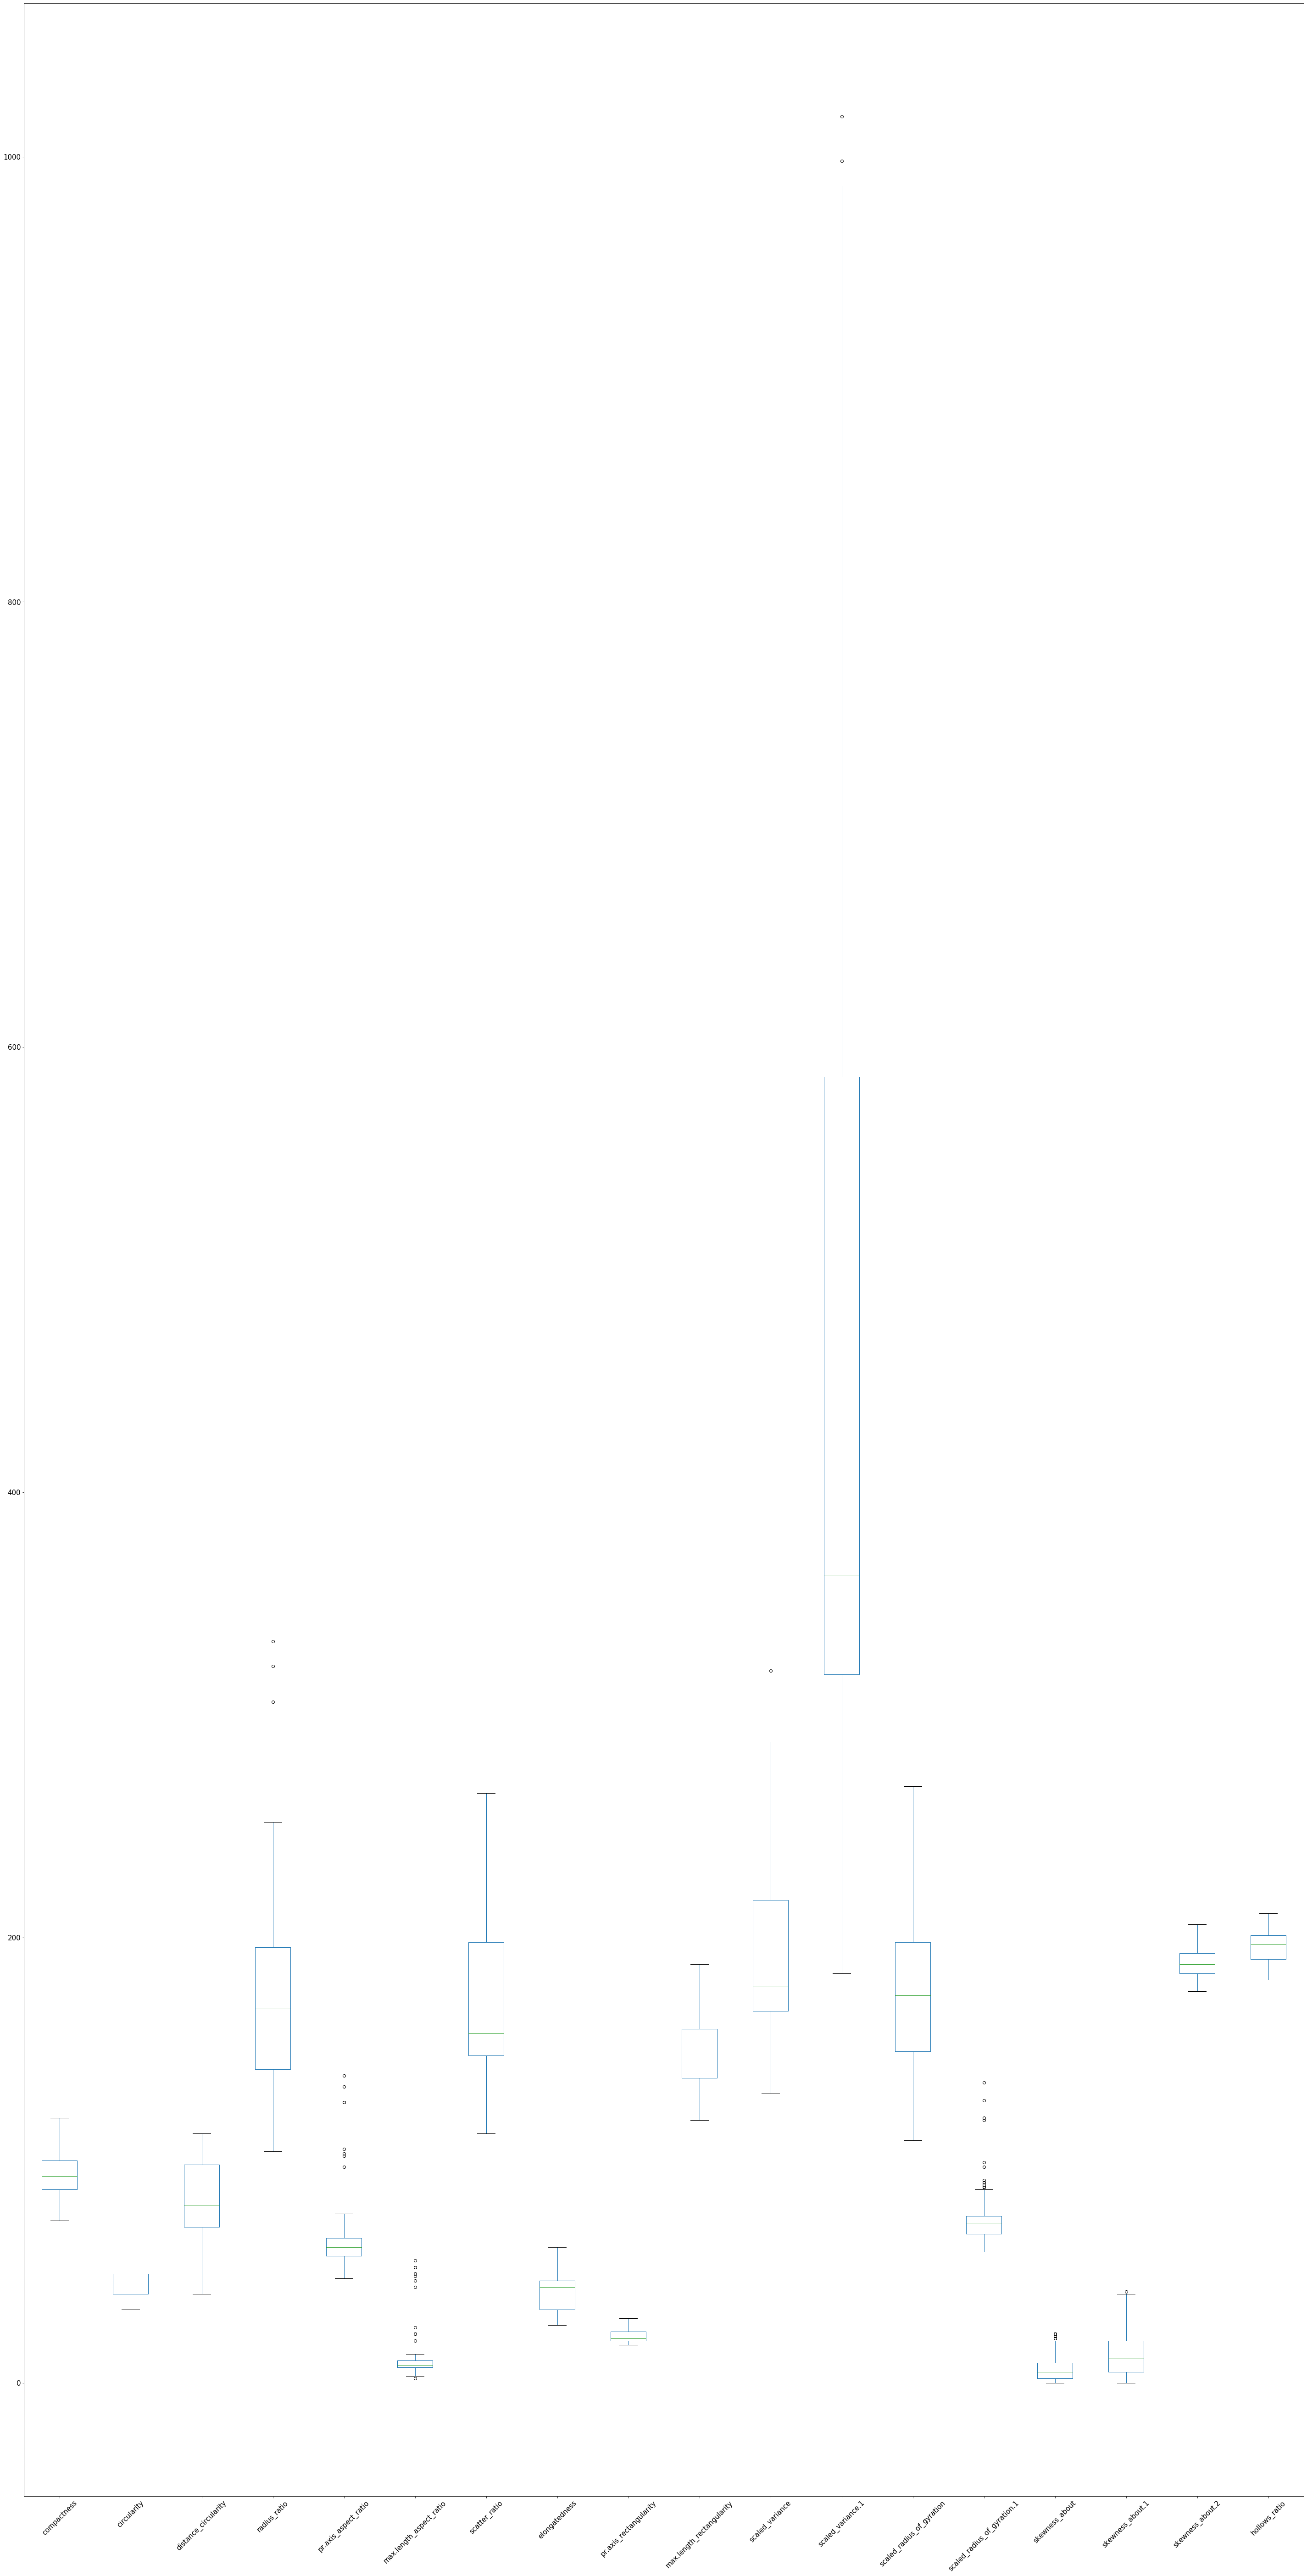

In [28]:
# sns.boxplot( data=pd.melt(vehicle_df))
vehicle_df.plot(kind = 'box', grid=False, rot=45, fontsize=15, figsize=(50, 100))
# A few columns contain outliers

In [29]:
# 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)

vehicle_df.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.684145,0.788366,0.689442,0.092272,0.148249,0.812789,-0.787218,0.813453,0.676143,0.761188,0.812979,0.584258,-0.249847,0.240503,0.157015,0.298537,0.365552
circularity,0.684145,1.000000,0.789169,0.623521,0.155774,0.251743,0.847008,-0.818047,0.840759,0.960427,0.795359,0.833704,0.923894,0.050454,0.144755,-0.010939,-0.103320,0.047590
distance_circularity,0.788366,0.789169,1.000000,0.769806,0.159701,0.265021,0.903229,-0.908900,0.890173,0.771932,0.858847,0.883217,0.701703,-0.229022,0.116697,0.266833,0.148591,0.336238
radius_ratio,0.689442,0.623521,0.769806,1.000000,0.660709,0.448613,0.737076,-0.791090,0.711301,0.571485,0.794880,0.720280,0.538180,-0.180128,0.055514,0.171340,0.381869,0.469316
pr.axis_aspect_ratio,0.092272,0.155774,0.159701,0.660709,1.000000,0.648552,0.104590,-0.183838,0.081091,0.127859,0.273305,0.089818,0.122047,0.153010,-0.057257,-0.032941,0.240241,0.267684
max.length_aspect_ratio,0.148249,0.251743,0.265021,0.448613,0.648552,1.000000,0.166311,-0.179357,0.161281,0.305943,0.318863,0.143010,0.189308,0.295653,0.017729,0.043422,-0.026081,0.143919
scatter_ratio,0.812789,0.847008,0.903229,0.737076,0.104590,0.166311,1.000000,-0.970770,0.989342,0.809454,0.948434,0.992470,0.799532,-0.027617,0.076556,0.212197,0.005786,0.119026
elongatedness,-0.787218,-0.818047,-0.908900,-0.791090,-0.183838,-0.179357,-0.970770,1.000000,-0.947136,-0.773018,-0.935335,-0.951642,-0.763429,0.102957,-0.053962,-0.186796,-0.113864,-0.215576
pr.axis_rectangularity,0.813453,0.840759,0.890173,0.711301,0.081091,0.161281,0.989342,-0.947136,1.000000,0.809715,0.933228,0.986900,0.794954,-0.015874,0.087768,0.215182,-0.018359,0.099407
max.length_rectangularity,0.676143,0.960427,0.771932,0.571485,0.127859,0.305943,0.809454,-0.773018,0.809715,1.000000,0.744550,0.793817,0.866047,0.041410,0.136774,0.001366,-0.103948,0.076770


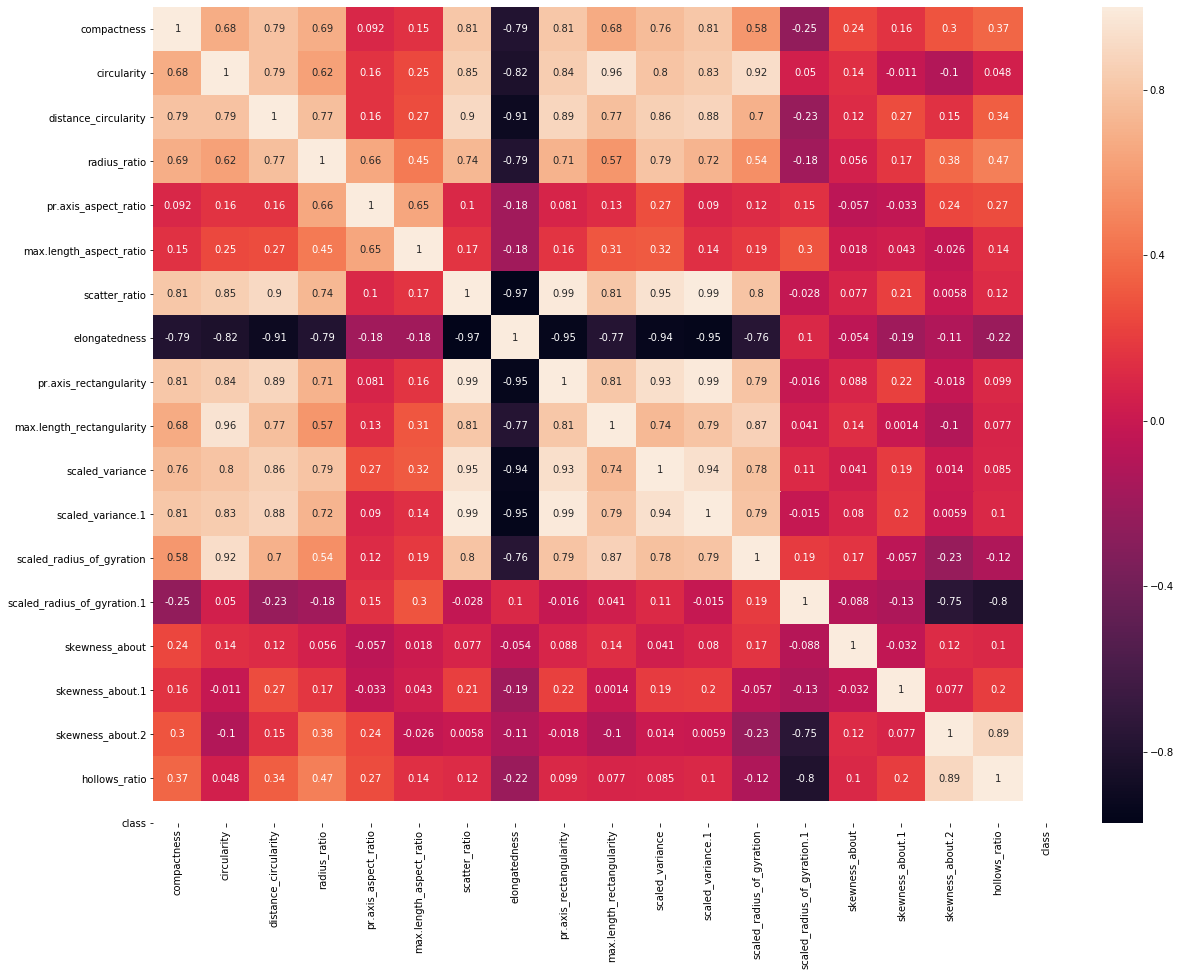

In [40]:
# vehicle_df_corr = vehicle_df.drop('class')

plt.figure(figsize=(20,15))

sns.heatmap(vehicle_df_corr.corr(), 
        xticklabels=vehicle_df.columns,
        yticklabels=vehicle_df.columns, annot=True)
# Elongatedness has a stron corelation with almost all the columns so let us not consider Elongatedness
# Also circularity has strong corelation(removing circularity)
# Also scalar_ratio has strong corelation(removing scalar_ratio)
# Also pr.axis_rectangularity has strong corelation(removing axis_rectangularity)
# Consideont scaled variance 1 and removing scaled variance 2


In [44]:
vehicle_df.columns
vehicle_df = vehicle_df.drop(['elongatedness', 'circularity', 'scatter_ratio', 'pr.axis_rectangularity', 'scaled_variance'],axis = 1)

In [45]:
vehicle_df.shape

(846, 14)

In [51]:
# 3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 pointsfrom scipy.stats import zscore
vehicle_df_std = vehicle_df.drop('class', axis = 1)
from scipy.stats import zscore

# Standardizing data
vehicle_df_std = vehicle_df_std.apply(zscore) 
vehicle_df_std.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,5.572112e-16,1.000592,-2.512695,-0.811520,-0.082445,0.768143,3.076880
distance_circularity,846.0,-1.307071e-16,1.000592,-2.665396,-0.763094,-0.128994,1.012387,1.900128
radius_ratio,846.0,1.763759e-16,1.000592,-1.944972,-0.839322,-0.032496,0.796741,4.898104
pr.axis_aspect_ratio,846.0,5.774210e-16,1.000592,-1.863913,-0.594598,-0.086872,0.420854,9.686854
max.length_aspect_ratio,846.0,-2.036721e-16,1.000592,-1.428157,-0.340845,-0.123383,0.311542,10.097349
max.length_rectangularity,846.0,7.968409e-16,1.000592,-2.067876,-0.758169,-0.137782,0.758332,2.757358
scaled_variance.1,846.0,-6.089166e-17,1.000592,-1.446560,-0.685669,-0.432039,0.836112,3.280313
scaled_radius_of_gyration,846.0,-1.687644e-16,1.000592,-2.020694,-0.791120,-0.022637,0.715107,2.866861
scaled_radius_of_gyration.1,846.0,6.110820e-16,1.000592,-1.801373,-0.729576,-0.059703,0.342221,8.380701
skewness_about,846.0,1.181088e-17,1.000592,-1.285591,-0.879160,-0.269513,0.543350,3.185152


In [52]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(vehicle_df_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [53]:
pca.components_

array([[-0.38406398, -0.41230061, -0.39537439, -0.16056054, -0.16737205,
        -0.36508914, -0.39323495, -0.33114504,  0.09320715, -0.08156992,
        -0.0881858 , -0.12464601, -0.1901411 ],
       [-0.03158062,  0.03213419, -0.07514264, -0.04919938,  0.09210375,
         0.22013191,  0.15680971,  0.30856908,  0.50275777, -0.03470098,
        -0.10738588, -0.53402598, -0.51232093],
       [-0.18241096, -0.11962384,  0.23585119,  0.64394804,  0.56886235,
        -0.10190785, -0.17905774, -0.12161226,  0.25542607, -0.15773645,
        -0.06898957,  0.04646618,  0.06510593],
       [ 0.04757852, -0.1308301 , -0.04399405,  0.06585819,  0.02066563,
         0.09397436, -0.12469735,  0.1346132 , -0.03087115,  0.61605913,
        -0.73080262,  0.12759742,  0.02414854],
       [ 0.02347287, -0.00310417, -0.06584583, -0.02280915,  0.21834654,
        -0.10213242, -0.06848732, -0.10417019,  0.14472906,  0.73783124,
         0.58980705, -0.08540369, -0.02068083],
       [-0.11145847,  0.119837

In [54]:
np.cumsum(pca.explained_variance_ratio_)
# 95% variance is covered at n = 7

array([0.38952072, 0.60839278, 0.74789294, 0.83214084, 0.90141758,
       0.93607726, 0.96004233, 0.97508337, 0.98450567, 0.99074388,
       0.99509628, 0.99822112, 1.        ])

In [57]:
pca = PCA(n_components = 7)
pca.fit(vehicle_df_std)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [59]:
transformed_values = pca.transform(vehicle_df_std)

In [60]:
transformed_values.shape

(846, 7)

In [61]:
transformed_df = pd.DataFrame(data=transformed_values)  
transformed_df

,0,1,2,3,4,5,6
0,-0.746325,0.011478,0.893772,-0.111694,0.091612,0.082243,-0.728073
1,0.873288,-0.521268,-0.356003,0.178100,0.686766,0.688152,0.072634
2,-2.944157,0.757415,-0.240343,1.199954,0.645536,-0.522421,-0.008729
3,0.429184,-2.880371,0.334046,0.341973,-0.302306,0.605984,0.306112
4,-0.750680,5.823782,10.996614,0.666755,3.391600,1.578647,2.131278
5,-2.844287,4.094808,-2.406374,-0.223895,-0.743411,-0.443459,0.728825
6,-0.126324,-2.164152,-0.087186,2.185887,-0.121711,-0.565424,0.044438
7,0.998990,-1.297390,0.738333,0.709296,-1.175866,0.498396,-0.242582
8,2.357224,-3.448989,0.499697,-0.446652,-0.508785,0.324841,0.196722
9,-1.093370,-1.842460,0.343642,-0.530512,-0.411884,0.470804,0.112017


In [69]:
# 4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

from sklearn.model_selection import train_test_split

Y = vehicle_df["class"]
X = vehicle_df.drop(["class"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

In [70]:
# standardising data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [71]:
# use from sklearn.svm import SVC
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled, y_train)


C:\Users\santosh\Anaconda\envs\virtual_environment_name\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [72]:
svc.score(X_train_scaled, y_train)

0.6334459459459459

In [73]:
svc.score(X_test_scaled, y_test)
# Clearly the prediction score is less. We use grid search to find the best hyper parameters


0.6141732283464567

In [74]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [75]:
param_grid = [    {        
     'kernel': ['linear', 'rbf'],        
     'C': [ 0.01, 0.05, 0.5, 1 ]    } ]

 

In [76]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [77]:
gs.fit(X_train_scaled, y_train) 

C:\Users\santosh\Anaconda\envs\virtual_environment_name\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=8,
             param_grid=[{'C': [0.01, 0.05, 0.5, 1],
                          'kernel': ['linear', 'rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [78]:
gs.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [79]:
gs.best_score_ 
# Grid search helped is finding the best C value and increased the score

0.8547297297297297

In [80]:
# Builiding a svc with the best hyper parameters from grid search to cross validate

# Building a Support Vector Machine with best hyper parameters
svc_model = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
    
svc_model.fit(X_train, y_train)



SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [81]:
svc_model.score(X_test, y_test)

0.952755905511811